<h1 style="color: white; 
    font-size: 46px; 
    text-align: center; 
    background: #00ccff; 
    padding: 30px; 
    ">Quality Report</h1>

In [3]:
from model_image import ModelImage
from functionality import FunctionalityAnalysis

# Image Binary Classification Model

In [4]:
model_path ='./saved_model/image-binary-classification-cats-vs-dogs'
data_tf = 'cats_vs_dogs'

In [5]:
model = ModelImage()
model.load_model(model_path = model_path)
model.load_data(data_tf = data_tf, test_samples=10)
y_pred, y_true = model.predict()

Model loaded! Input shape: (None, 224, 224, 3) , number of classes: 1
Data loaded!  <PrefetchDataset shapes: ((None, 224, 224, 3), (None,)), types: (tf.float32, tf.int64)>


              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         7

    accuracy                           1.00        10
   macro avg       1.00      1.00      1.00        10
weighted avg       1.00      1.00      1.00        10



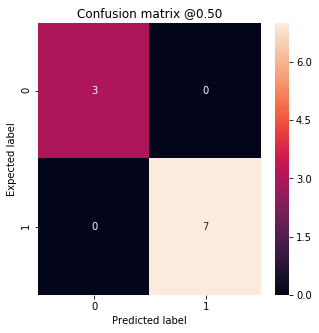

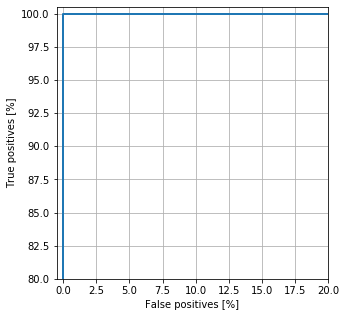

None


In [6]:
FunctionalityAnalysis(y_true, y_pred, 'binary classification').evaluate()

# Image Multiclass Classification Model

### - TF dataset

In [7]:
model_path ='./saved_model/image-multiclass-mnist-no-robust'
data_tf = 'mnist'

In [8]:
model = ModelImage()
model.load_model(model_path = model_path)
model.load_data(data_tf=data_tf, test_samples=10)
y_pred, y_true = model.predict()

Model loaded! Input shape: (None, 28, 28, 1) , number of classes: 10
Data loaded!  <PrefetchDataset shapes: ((None, 28, 28, 1), (None,)), types: (tf.float32, tf.int64)>


              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         3
           2       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         1
           6       1.00      1.00      1.00         1
           7       1.00      1.00      1.00         2
           8       1.00      1.00      1.00         1

    accuracy                           1.00        10
   macro avg       1.00      1.00      1.00        10
weighted avg       1.00      1.00      1.00        10



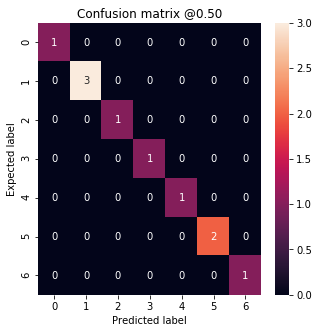

In [9]:
FunctionalityAnalysis(y_true, y_pred, 'multiclass classification').evaluate()

### - Dataset from directory

In [10]:
model_path = './saved_model/saved_model/flower_photos'
data_path = './datasets/flower_photos'

In [11]:
model = ModelImage()
model.load_model(model_path = model_path)
model.load_data(data_dir = data_path, split = 0.01)
y_pred, y_true = model.predict()

Model loaded! Input shape: (None, 180, 180, 3) , number of classes: 5
Found 3670 files belonging to 5 classes.
Using 100 files for validation.
Data loaded!  <PrefetchDataset shapes: ((None, 180, 180, 3), (None,)), types: (tf.float32, tf.int32)>


              precision    recall  f1-score   support

           0       0.85      0.58      0.69        19
           1       0.67      0.78      0.72        23
           2       0.65      0.52      0.58        21
           3       0.58      0.94      0.71        16
           4       0.71      0.57      0.63        21

    accuracy                           0.67       100
   macro avg       0.69      0.68      0.67       100
weighted avg       0.69      0.67      0.66       100



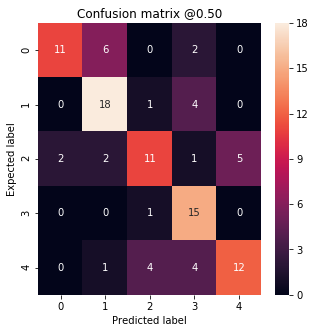

In [12]:
FunctionalityAnalysis(y_true, y_pred, 'multiclass classification').evaluate()

# Regression Model

mean absolute error              0.08600000000000001
mean squared error               0.00996
coefficient of determination     0.8603888367138111


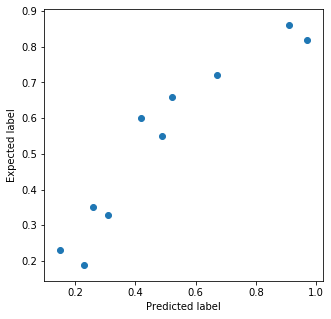

In [13]:
y_true = [0.23, 0.42, 0.97, 0.31, 0.67, 0.26, 0.52, 0.91, 0.15, 0.49]
y_pred = [0.19, 0.60, 0.82, 0.33, 0.72, 0.35, 0.66, 0.86, 0.23, 0.55]

FunctionalityAnalysis(y_true, y_pred, 'regression').evaluate()